# Introduction to trackintel

This tutorial will show you the most important functionalities of trackintel.

- Trackintel focuses on the hierachical data model for movement data. 
- ...
- 
You can enter the hierarchy from any level and generate higher aggregation data and perform multiple analysis with your input data.

To get started, we import trackintel and other necessary libraries.



In [30]:
import os

import trackintel as ti
import geopandas as gpd
import pandas as pd
from IPython import display

from matplotlib import pyplot as plt
%matplotlib inline

'C:\\Users\\henry\\OneDrive\\Programming\\trackintel-tutorial\\sigspatial23'

# Data import using Geopandas
### Load data into Geopandas
As a first step, any data that we want to use with trackintel has to be loaded as trackintel class. For some data sources, trackintel has specific [data loaders]https://trackintel.readthedocs.io/en/latest/modules/io.html#predefined-dataset-readers) but most of the time you will have to manually load the data. 

The standard way to load data into trackintel is to create a geopandas dataframe first and then transform it into trackintel. We now load a standard geojson file that contains trackpoints of a person.

In [27]:
# we read geojson files using geopandas function
gdf = gpd.read_file('../Data/pfs_tutorial.geojson')
gdf.head(5)

,id,lat,lon,elevation,time,User,accuracy,geometry
0,0,39.984702,116.318417,149.9616,2008-10-23 02:53:04+00:00,0,None,POINT (116.31842 39.98470)
1,1,39.984683,116.318450,149.9616,2008-10-23 02:53:10+00:00,0,None,POINT (116.31845 39.98468)
2,2,39.984686,116.318417,149.9616,2008-10-23 02:53:15+00:00,0,None,POINT (116.31842 39.98469)
3,3,39.984688,116.318385,149.9616,2008-10-23 02:53:20+00:00,0,None,POINT (116.31839 39.98469)
4,4,39.984655,116.318263,149.9616,2008-10-23 02:53:25+00:00,0,None,POINT (116.31826 39.98465)


### Load geodataframe into trackintel
The next step is to load the GeoDataFrame as a trackintel positionfix class. The trackintel classes have some specific requirements on column names. 

For positionfixes these are: 
| **Positionfix** |
|-----------------|
| user_id         |
| geometry        |
| tracked_at    

Additionally, the dataframe can hold arbitrary additional columns. To be able to use the GeoDataFrame for trackintel, we will have to rename some of the columns. For this, trackintel offers a helper function [positionfixes_from_gpd](https://trackintel.readthedocs.io/en/latest/modules/io.html#geodataframe-import). 

The helper function allows to rename the columns and define a timezone. The index is assumed to be the unique identifier of the data.cur.

In [32]:
pfs = ti.io.read_positionfixes_gpd(gdf, tracked_at="time", user_id="User", geom_col="geometry", tz='UTC')
print(type(pfs))
display.display(pfs)


<class 'trackintel.model.positionfixes.Positionfixes'>


,id,lat,lon,elevation,tracked_at,user_id,accuracy,geometry
0,0,39.984702,116.318417,149.9616,2008-10-23 02:53:04+00:00,0,None,POINT (116.31842 39.98470)
1,1,39.984683,116.318450,149.9616,2008-10-23 02:53:10+00:00,0,None,POINT (116.31845 39.98468)
2,2,39.984686,116.318417,149.9616,2008-10-23 02:53:15+00:00,0,None,POINT (116.31842 39.98469)
3,3,39.984688,116.318385,149.9616,2008-10-23 02:53:20+00:00,0,None,POINT (116.31839 39.98469)
4,4,39.984655,116.318263,149.9616,2008-10-23 02:53:25+00:00,0,None,POINT (116.31826 39.98465)
...,...,...,...,...,...,...,...,...
4236,4236,39.977904,116.327067,99.9744,2008-10-24 06:35:35+00:00,1,None,POINT (116.32707 39.97790)
4237,4237,39.977907,116.327066,99.9744,2008-10-24 06:35:40+00:00,1,None,POINT (116.32707 39.97791)
4238,4238,39.977900,116.327064,99.9744,2008-10-24 06:35:45+00:00,1,None,POINT (116.32706 39.97790)
4239,4239,39.977900,116.327064,99.9744,2008-10-24 06:35:48+00:00,1,None,POINT (116.32706 39.97790)


`pfs` is now a Trackintel class and has access to all Trackintel functions.


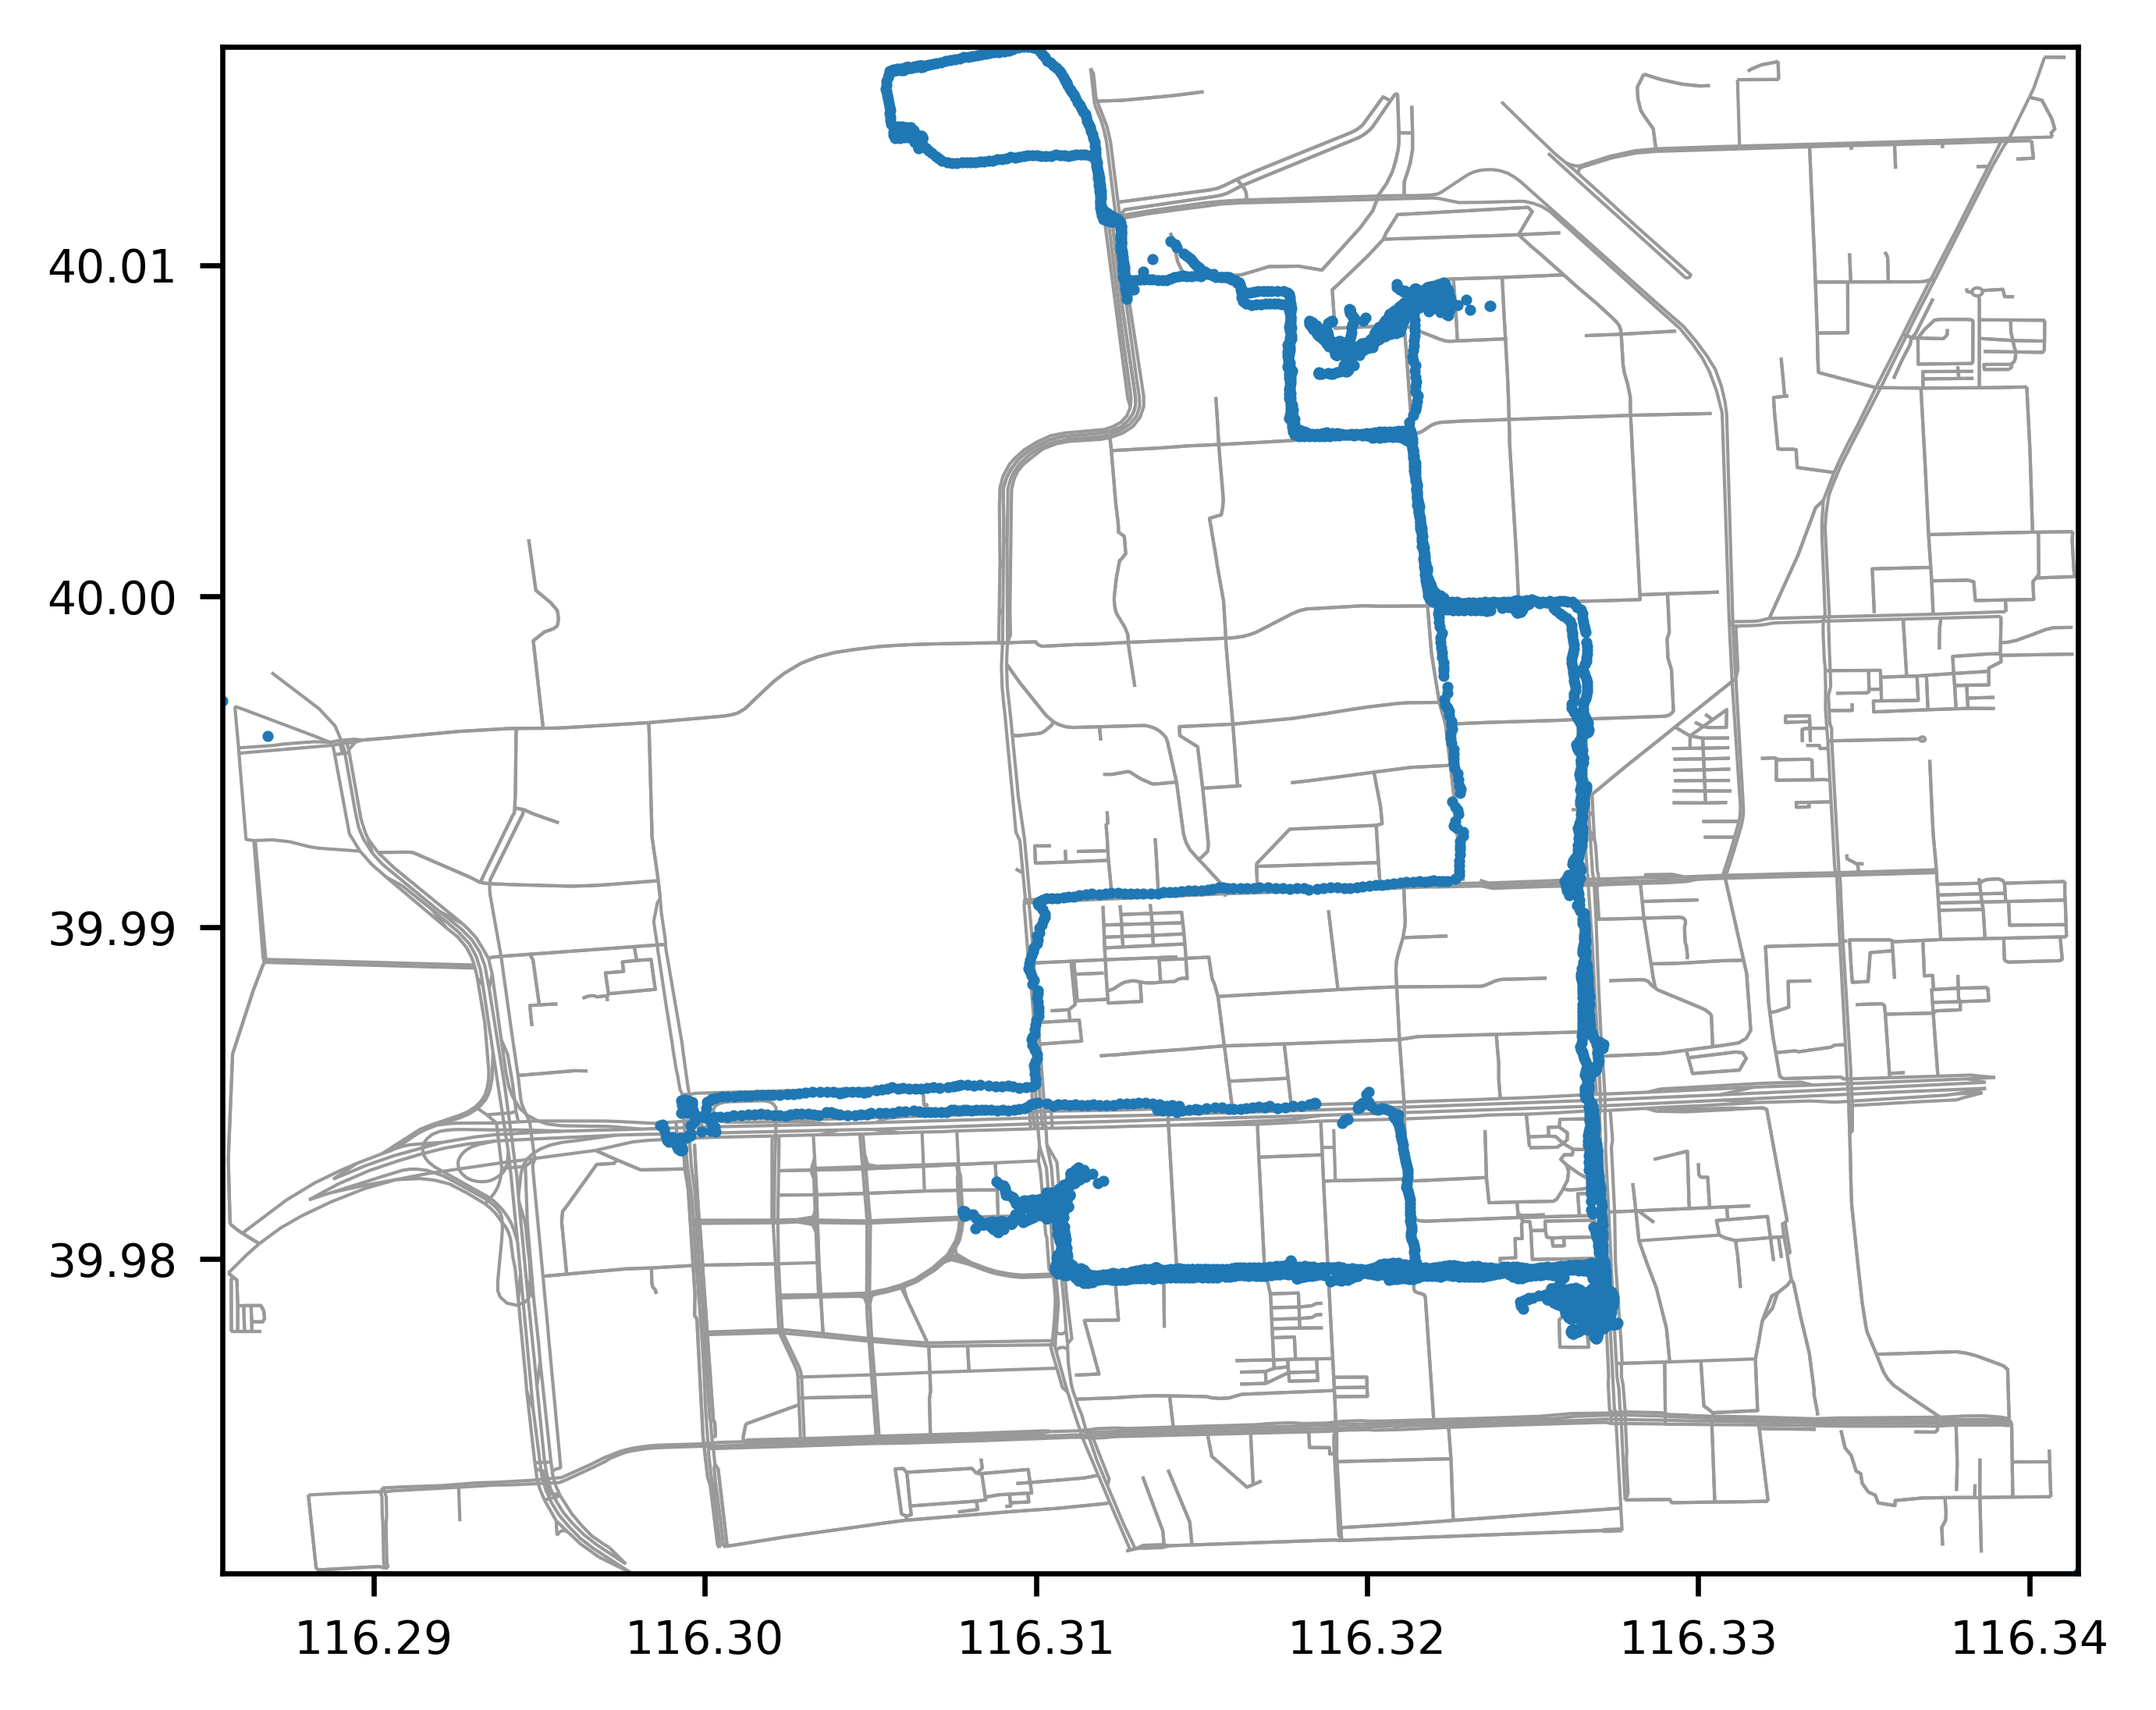

In [46]:
ti.plot(pfs, plot_osm=True) 

# Import the Geolife dataset using the data loader

For some popular datasets, Trackintel offers a dedicated dataloader which takes care of all data reading and transformation steps and greatly facilitates working with the dataset.


The [Geolife dataset](https://www.microsoft.com/en-us/research/publication/geolife-gps-trajectory-dataset-user-guide/) is a collection of GPS trajectory data from 182 users, covering over 1.2 million kilometers and diverse transport modes, primarily collected between 2007 and 2012. It's widely used in research for studying human mobility, traffic patterns, and urban planning. It was collected by Microsoft Research.

We have created a subset of the Geolife dataset that is available in `\Data\Geolife`. The Geolife dataset as it is downloaded uses a very particular custom data structure that require a lot of effort to properly read. Luckly we can simple use the `read_geolife` function from trackintel. 
ries 1.1},
}


In [49]:
geolife_pfs = ti.io.dataset_reader.read_geolife('../Data/Geolife/Data', print_progress=True)
display.display(geolife_pfs)

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:20<00:00,  1.03s/it]


(         elevation                tracked_at                        geom  \
 id                                                                         
 0         149.9616 2008-10-23 05:53:05+00:00  POINT (116.31924 39.98409)   
 1         149.9616 2008-10-23 05:53:06+00:00  POINT (116.31932 39.98420)   
 2         149.9616 2008-10-23 05:53:11+00:00  POINT (116.31940 39.98422)   
 3         149.9616 2008-10-23 05:53:16+00:00  POINT (116.31939 39.98421)   
 4         149.6568 2008-10-23 05:53:21+00:00  POINT (116.31942 39.98422)   
 ...            ...                       ...                         ...   
 4396665    32.6136 2010-06-04 02:05:35+00:00  POINT (116.33087 39.97561)   
 4396666    32.0040 2010-06-04 02:05:37+00:00  POINT (116.33100 39.97563)   
 4396667    28.0416 2010-06-04 02:05:40+00:00  POINT (116.33121 39.97550)   
 4396668    32.3088 2010-06-04 02:05:42+00:00  POINT (116.33133 39.97545)   
 4396669    32.6136 2010-06-04 02:05:45+00:00  POINT (116.33148 39.97545)   

In [53]:
geolife_pfs, _ = ti.io.dataset_reader.read_geolife('../Data/Geolife/Data', print_progress=True)
display.display(geolife_pfs)

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:23<00:00,  1.19s/it]


,elevation,tracked_at,geom,user_id,accuracy
id,,,,,
0,149.9616,2008-10-23 05:53:05+00:00,POINT (116.31924 39.98409),1,NaN
1,149.9616,2008-10-23 05:53:06+00:00,POINT (116.31932 39.98420),1,NaN
2,149.9616,2008-10-23 05:53:11+00:00,POINT (116.31940 39.98422),1,NaN
3,149.9616,2008-10-23 05:53:16+00:00,POINT (116.31939 39.98421),1,NaN
4,149.6568,2008-10-23 05:53:21+00:00,POINT (116.31942 39.98422),1,NaN
...,...,...,...,...,...
4396665,32.6136,2010-06-04 02:05:35+00:00,POINT (116.33087 39.97561),169,NaN
4396666,32.0040,2010-06-04 02:05:37+00:00,POINT (116.33100 39.97563),169,NaN
4396667,28.0416,2010-06-04 02:05:40+00:00,POINT (116.33121 39.97550),169,NaN


RuntimeError: Unable to determine UTM CRS

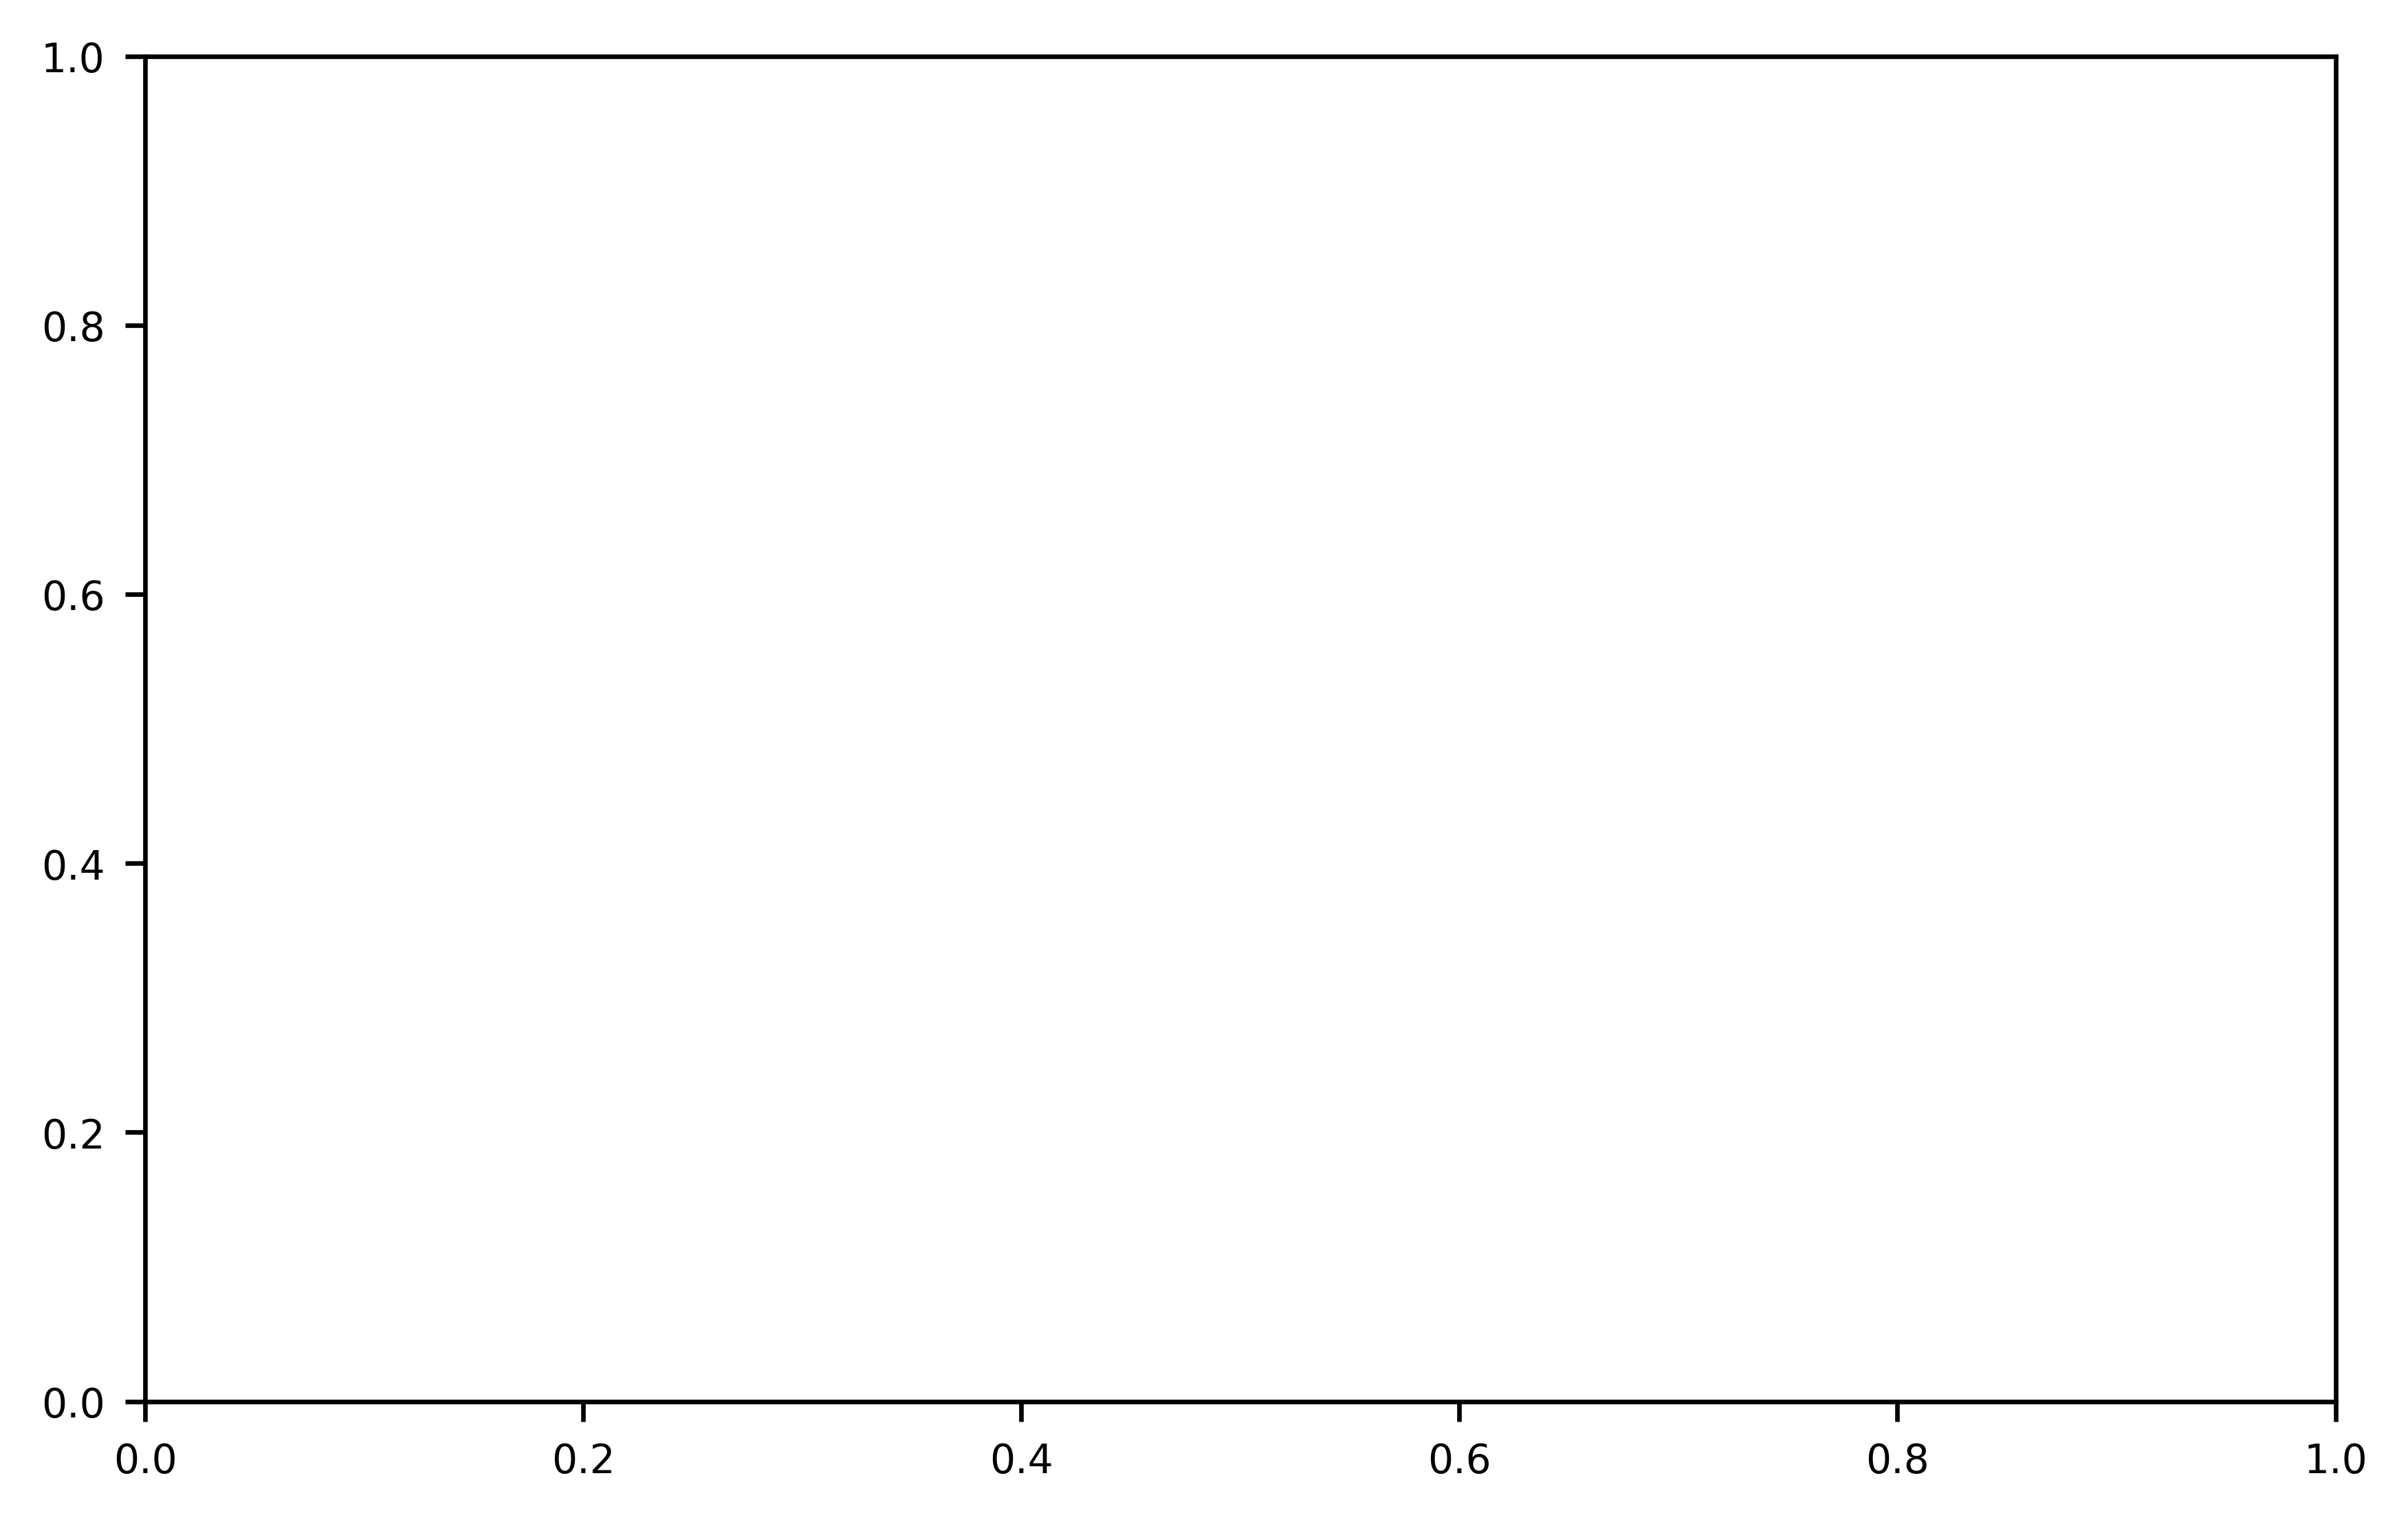

In [61]:

ti.plot(geolife_pfs, plot_osm=True)


In [ ]:
Henry

# Processing tracking data through the hierarchy

This is the recommended way to import data. We also provide functions to directly load data from csv files: [read_positionfixes_csv](https://trackintel.readthedocs.io/en/latest/modules/io.html#csv-file-import). Or load data from Geolife dataset: [read_geolife](https://trackintel.readthedocs.io/en/latest/modules/io.html#trackintel.io.dataset_reader.read_geolife)

In [ ]:
# Load example geolife dataset
pfs, _ = ti.io.read_geolife('../tests/data/geolife_long')
# plot the raw positionfixes
ti.plot(positionfixes=pfs, plot_osm=True)

Once imported trackintel classes like Positionfixes can be used like GeoDataFrames

In [ ]:
pfs["new_column"] = 1
pfs.head()

We provide import data functions for each data level. Detailed information can be found in the [I/O module](https://trackintel.readthedocs.io/en/latest/modules/io.html#)

# Data model generation
All trackintel classes have of course different methods available depending on the data level.
Relevant information can be found in the [Model documentation](https://trackintel.readthedocs.io/en/latest/modules/model.html). Equivalent functions exist for every method and can be called directly from the respective module.

As an example, we generate the staypoints and triplegs with the raw positionfix data.

In [ ]:
# generate staypoints from positionfixes. The two lines are equivalent
pfs, sp = pfs.generate_staypoints(method='sliding', dist_threshold=100, time_threshold=5.0, include_last=False)
# pfs, sp = ti.preprocessing.generate_staypoints(pfs, method='sliding', dist_threshold=100, time_threshold=5.0, include_last=False)

# generate triplegs from positionfixes and staypoints. 
pfs, tpls = pfs.generate_triplegs(sp, method='between_staypoints', gap_threshold=15)
# pfs, tpls = ti.preprocessing.generate_triplegs(pfs, sp, method="between_staypoints", gap_threshold=15)

# plot the triplegs together with staypoints and positionfixes
ti.plot(triplegs=tpls, positionfixes=pfs, staypoints=sp, radius_sp=30, plot_osm=True)

We can also generate trip as aggregation of triplegs to a single activity, see [generate_trips](https://trackintel.readthedocs.io/en/latest/modules/preprocessing.html#trackintel.preprocessing.triplegs.generate_trips) for more information.

In [ ]:
# infer activity label based on duration, here any staypoint larger than 15 min is considered as an activity
sp = sp.create_activity_flag(time_threshold=15)

# generate trips with triplegs and staypoints with activity labels
sp, tpls, trips = ti.preprocessing.generate_trips(sp, tpls, gap_threshold=15)

trips.head(5)

# Analysis
The [analysis module](https://trackintel.readthedocs.io/en/latest/modules/analysis.html) in *trackintel* focuses on the semantic enrichment and quantitative analysis of human movement data. As an example, we provide labeling functions to infer semantic labels of staypoints and triplegs.


In [ ]:
# infer activity label based on duration
sp = sp.create_activity_flag(time_threshold=15)

# the result is the original staypoint with a column 'is_activity', indicating whether the stp correspond to an activity
sp.head(5)

In [ ]:
# infer transport mode based on speed 
tpls = tpls.predict_transport_mode()

# the result is the original tripleg with a column 'mode'
tpls.head(5)

The tracking coverage of each user can be obtained using [temporal_tracking_quality()](https://trackintel.readthedocs.io/en/latest/modules/analysis.html#trackintel.analysis.tracking_quality.temporal_tracking_quality)

In [ ]:
# we concate sp and tpls to get the whole mobility trace
trace = pd.concat([sp, tpls])

# calculate the overall tracking coverage
ti.analysis.temporal_tracking_quality(trace, granularity='all')

In [ ]:
# or coverage by day or hour
ti.analysis.temporal_tracking_quality(trace, granularity='hour')
ti.analysis.temporal_tracking_quality(trace, granularity='day')

We can also calculate the modal split of triplegs using [calculate_modal_split()](https://trackintel.readthedocs.io/en/latest/modules/analysis.html#trackintel.analysis.modal_split.calculate_modal_split) and visualize the results using [plot_modal_split()](https://trackintel.readthedocs.io/en/latest/modules/visualization.html#trackintel.visualization.modal_split.plot_modal_split)

In [ ]:
# for the modal split we load a special subset of geolife dataset with tripleg modes
pfs, labels = ti.io.read_geolife('../tests/data/geolife_modes')

# sp and tpls are generated 
pfs, sp = pfs.generate_staypoints(method="sliding", dist_threshold=25, time_threshold=5)
_, tpls = pfs.generate_triplegs(sp, method="between_staypoints")

# the mode labels are assigned to each tpls
tpls_with_modes = ti.io.geolife_add_modes_to_triplegs(tpls, labels)
tpls_with_modes.head(5)

In [ ]:
# the modal split can then be calculated
modal_split = ti.analysis.calculate_modal_split(tpls_with_modes, metric="count", freq="D", per_user=False, norm=True)

# and visualized
ti.plot_modal_split(modal_split, date_fmt_x_axis='%d', y_label='Percentage of daily count', x_label='days')
plt.show()

# Save results
The generated data can be exported as csv files using [`to_csv()` functions](https://trackintel.readthedocs.io/en/latest/modules/io.html#csv-file-export) registered to each data model. For each function in the visualization module, we provide an `filename` parameter to directly save the figures as a file.

In [ ]:
# save datamodels to csv files
pfs.to_csv('./out/pfs_tutorial.csv')
sp.to_csv('./out/sp_tutorial.csv')
tpls.to_csv('./out/tpls_tutorial.csv')
trips.to_csv('./out/trips_tutorial.csv')

# filename will save the generated plot as a file
ti.plot(filename='./out/pfs.png', positionfixes=pfs)

For database users, we provide functions and instructions to support the import and export from PostGIS databases. Further information can be found in the [trackintel documentation](https://trackintel.readthedocs.io/en/latest/). 

Thanks for using trackintel. If you discover any bug and/or have an idea for a usful funcionality feel free to open an [issue](https://github.com/mie-lab/trackintel/issues)